In [1]:
# check version number
import imblearn
print(imblearn.__version__)

0.7.0


# Generate and plot a synthetic imbalanced classification dataset

Counter({0: 9900, 1: 100})


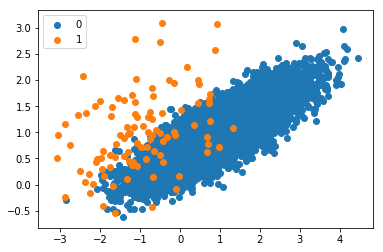

In [5]:
from collections import Counter
from sklearn.datasets import make_classification
from matplotlib import pyplot
%matplotlib inline
from numpy import where


# define dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
	n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)


# summarize class distribution
counter = Counter(y)
print(counter)


# scatter plot of examples by class label
for label, _ in counter.items():
	row_ix = where(y == label)[0]
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

Counter({0: 9900, 1: 9900})


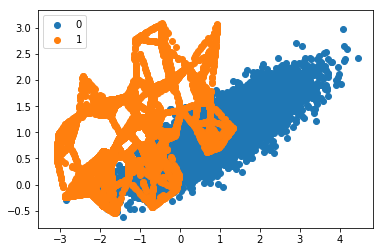

In [7]:
from imblearn.over_sampling import SMOTE

# transform the dataset
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)


# summarize the new class distribution
counter = Counter(y)
print(counter)


# scatter plot of examples by class label
for label, _ in counter.items():
	row_ix = where(y == label)[0]
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

# Oversample with SMOTE and random undersample for imbalanced dataset

Counter({0: 9900, 1: 100})
Counter({0: 1980, 1: 990})


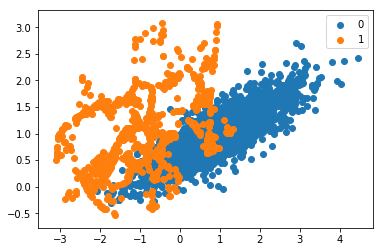

In [8]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from matplotlib import pyplot
%matplotlib inline
from numpy import where


# define dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
	n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)


# summarize class distribution
counter = Counter(y)
print(counter)


# define pipeline
over = SMOTE(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.5)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)


# transform the dataset
X, y = pipeline.fit_resample(X, y)


# summarize the new class distribution
counter = Counter(y)
print(counter)


# scatter plot of examples by class label
for label, _ in counter.items():
	row_ix = where(y == label)[0]
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

# decision tree evaluated on imbalanced dataset

In [9]:
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier


# define dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
	n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)


# define model
model = DecisionTreeClassifier()


# evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(model, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
print('Mean ROC AUC: %.3f' % mean(scores))

Mean ROC AUC: 0.761


# decision tree evaluated on imbalanced dataset with SMOTE oversampling

In [10]:
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE


# define dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
	n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)


# define pipeline
steps = [('over', SMOTE()), ('model', DecisionTreeClassifier())]
pipeline = Pipeline(steps=steps)


# evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(pipeline, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
print('Mean ROC AUC: %.3f' % mean(scores))

Mean ROC AUC: 0.822


# decision tree  on imbalanced dataset with SMOTE oversampling and random undersampling

In [12]:
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler


# define dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
	n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)


# define pipeline
model = DecisionTreeClassifier()
over = SMOTE(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.5)
steps = [('over', over), ('under', under), ('model', model)]
pipeline = Pipeline(steps=steps)


# evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(pipeline, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
print('Mean ROC AUC: %.3f' % mean(scores))

Mean ROC AUC: 0.841


# grid search k value for SMOTE oversampling for imbalanced classification

In [13]:
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler


# define dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
	n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)


# values to evaluate
k_values = [1, 2, 3, 4, 5, 6, 7]
for k in k_values:
	# define pipeline
	model = DecisionTreeClassifier()
	over = SMOTE(sampling_strategy=0.1, k_neighbors=k)
	under = RandomUnderSampler(sampling_strategy=0.5)
	steps = [('over', over), ('under', under), ('model', model)]
	pipeline = Pipeline(steps=steps)
	# evaluate pipeline
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(pipeline, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
	score = mean(scores)
	print('> k=%d, Mean ROC AUC: %.3f' % (k, score))

> k=1, Mean ROC AUC: 0.824
> k=2, Mean ROC AUC: 0.836
> k=3, Mean ROC AUC: 0.842
> k=4, Mean ROC AUC: 0.846
> k=5, Mean ROC AUC: 0.836
> k=6, Mean ROC AUC: 0.832
> k=7, Mean ROC AUC: 0.841


# borderline-SMOTE for imbalanced dataset

Counter({0: 9900, 1: 100})
Counter({0: 9900, 1: 9900})


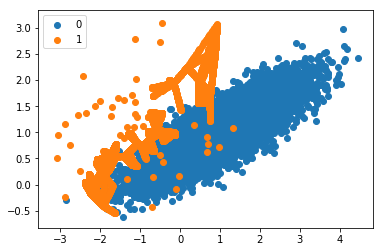

In [14]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import BorderlineSMOTE
from matplotlib import pyplot
from numpy import where


# define dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
	n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)


# summarize class distribution
counter = Counter(y)
print(counter)


# transform the dataset
oversample = BorderlineSMOTE()
X, y = oversample.fit_resample(X, y)


# summarize the new class distribution
counter = Counter(y)
print(counter)


# scatter plot of examples by class label
for label, _ in counter.items():
	row_ix = where(y == label)[0]
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

# borderline-SMOTE with SVM for imbalanced dataset

Counter({0: 9900, 1: 100})
Counter({0: 9900, 1: 9900})


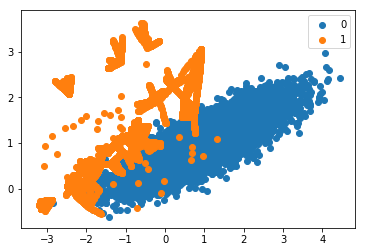

In [15]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SVMSMOTE
from matplotlib import pyplot
from numpy import where
# define dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
	n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)
# summarize class distribution
counter = Counter(y)
print(counter)
# transform the dataset
oversample = SVMSMOTE()
X, y = oversample.fit_resample(X, y)
# summarize the new class distribution
counter = Counter(y)
print(counter)
# scatter plot of examples by class label
for label, _ in counter.items():
	row_ix = where(y == label)[0]
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

# Oversample and plot imbalanced dataset with ADASYN

Counter({0: 9900, 1: 100})
Counter({0: 9900, 1: 9899})


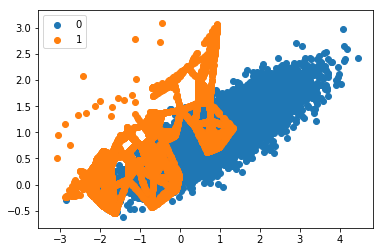

In [16]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import ADASYN
from matplotlib import pyplot
from numpy import where
# define dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
	n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)
# summarize class distribution
counter = Counter(y)
print(counter)
# transform the dataset
oversample = ADASYN()
X, y = oversample.fit_resample(X, y)
# summarize the new class distribution
counter = Counter(y)
print(counter)
# scatter plot of examples by class label
for label, _ in counter.items():
	row_ix = where(y == label)[0]
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

# try different models and oversampling techniques on imbalanced dataset

In [2]:
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import ADASYN, SMOTE, SVMSMOTE, BorderlineSMOTE
from imblearn.under_sampling import RandomUnderSampler


# define dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
	n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)

# define models
models = []
models.append(('RF', RandomForestClassifier()))
models.append(('Adaboost', AdaBoostClassifier()))
models.append(('Bagging', BaggingClassifier()))
models.append(('ExtraTrees', ExtraTreesClassifier()))
models.append(('Gr. Boosting', GradientBoostingClassifier()))

# define oversampling techniques
oversampling = []
              
oversampling.append(('ADASYN', ADASYN(sampling_strategy=0.1)))
oversampling.append(('SMOTE-SVM', SVMSMOTE(sampling_strategy=0.1)))
oversampling.append(('Borderline-SMOTE', BorderlineSMOTE(sampling_strategy = 0.1)))
oversampling.append(('SMOTE', SMOTE(sampling_strategy=0.1)))              

# define ondersampling techniques
under = RandomUnderSampler(sampling_strategy=0.5)

for model in models:
    for over in oversampling:
        for flag in [0,1]:
            if flag == 1:
                #define pipeline
                steps = [('over', over[1]), ('under', under), ('model', model[1])]
                pipeline = Pipeline(steps=steps)

                # evaluate pipeline
                cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
                scores = cross_val_score(pipeline, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
                score = mean(scores)
                print('> With Under, ' + model[0] + ", " + over[0] + '--> Mean ROC AUC: %.3f' % score)
            else:
                #define pipeline
                steps = [('over', over[1]), ('model', model[1])]
                pipeline = Pipeline(steps=steps)

                # evaluate pipeline
                cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
                scores = cross_val_score(pipeline, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
                score = mean(scores)
                print('> NO Under, ' + model[0] + ", " + over[0] + '--> Mean ROC AUC: %.3f' % score)

> NO Under, RF, ADASYN--> Mean ROC AUC: 0.911
> With Under, RF, ADASYN--> Mean ROC AUC: 0.932
> NO Under, RF, SMOTE-SVM--> Mean ROC AUC: 0.908
> With Under, RF, SMOTE-SVM--> Mean ROC AUC: 0.932
> NO Under, RF, Borderline-SMOTE--> Mean ROC AUC: 0.904
> With Under, RF, Borderline-SMOTE--> Mean ROC AUC: 0.925
> NO Under, RF, SMOTE--> Mean ROC AUC: 0.901
> With Under, RF, SMOTE--> Mean ROC AUC: 0.926
> NO Under, Adaboost, ADASYN--> Mean ROC AUC: 0.933
> With Under, Adaboost, ADASYN--> Mean ROC AUC: 0.937
> NO Under, Adaboost, SMOTE-SVM--> Mean ROC AUC: 0.953
> With Under, Adaboost, SMOTE-SVM--> Mean ROC AUC: 0.949
> NO Under, Adaboost, Borderline-SMOTE--> Mean ROC AUC: 0.948
> With Under, Adaboost, Borderline-SMOTE--> Mean ROC AUC: 0.950
> NO Under, Adaboost, SMOTE--> Mean ROC AUC: 0.940
> With Under, Adaboost, SMOTE--> Mean ROC AUC: 0.936
> NO Under, Bagging, ADASYN--> Mean ROC AUC: 0.886
> With Under, Bagging, ADASYN--> Mean ROC AUC: 0.905
> NO Under, Bagging, SMOTE-SVM--> Mean ROC AUC: 